## RSI 14日線，70 超賣、30 超買 + 5 日、10 日 MA 交叉


 0050_2018.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


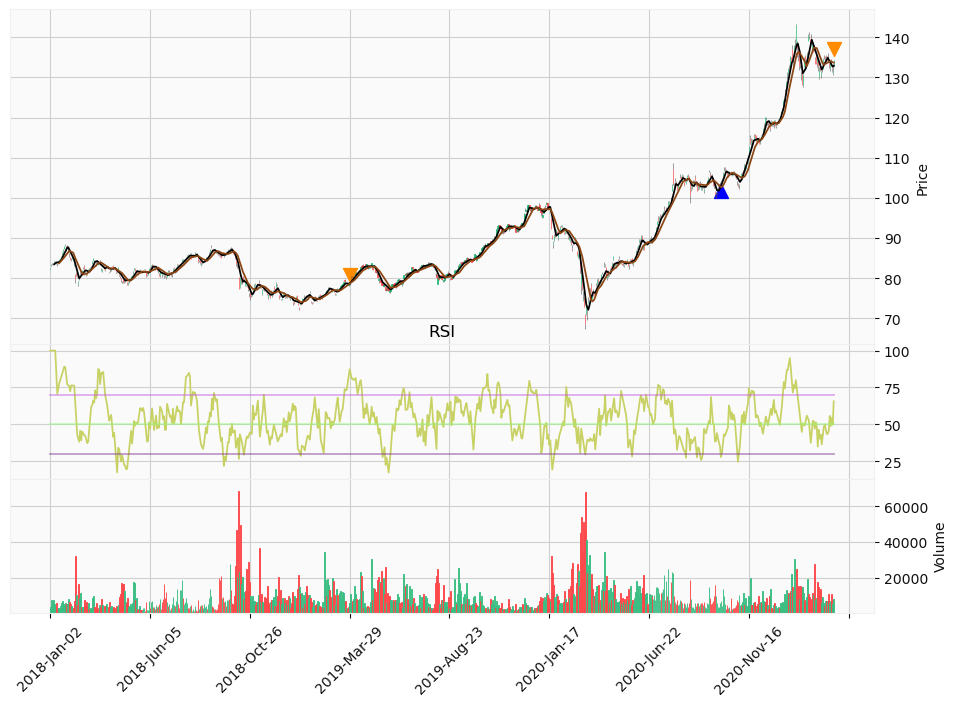

支出： 500000 元
收入： 640583 元
淨收益： 140583 元
投資報酬率： 28.12 %

 1304_2011.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


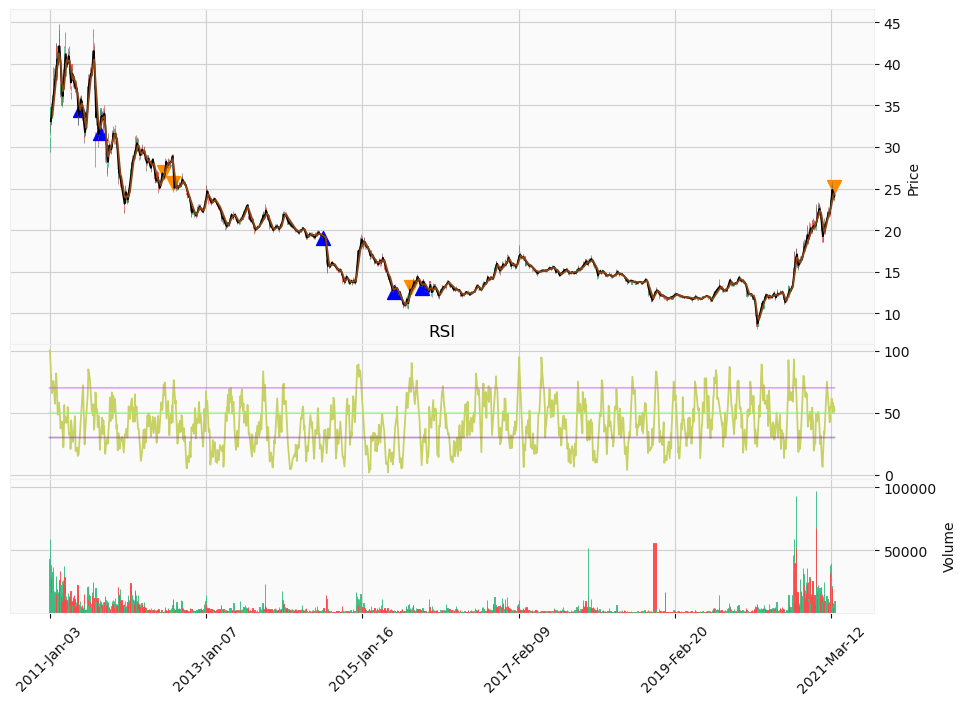

支出： 500000 元
收入： 435800 元
淨收益： -64200 元
投資報酬率： -12.84 %

 1762_2010.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


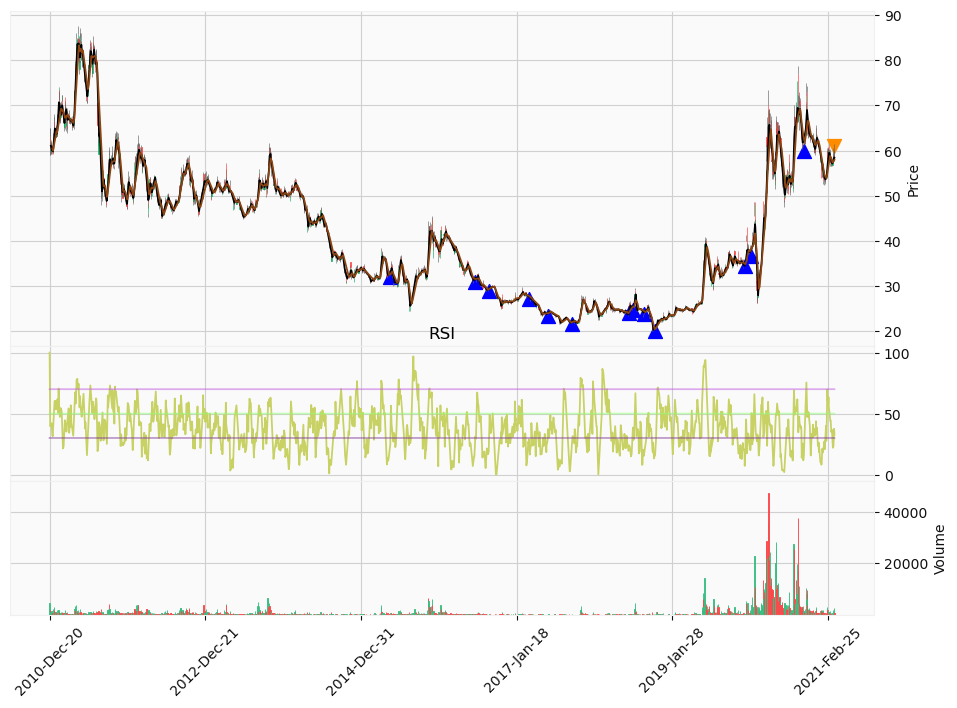

支出： 500000 元
收入： 881295 元
淨收益： 381295 元
投資報酬率： 76.26 %

 2065_2017.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


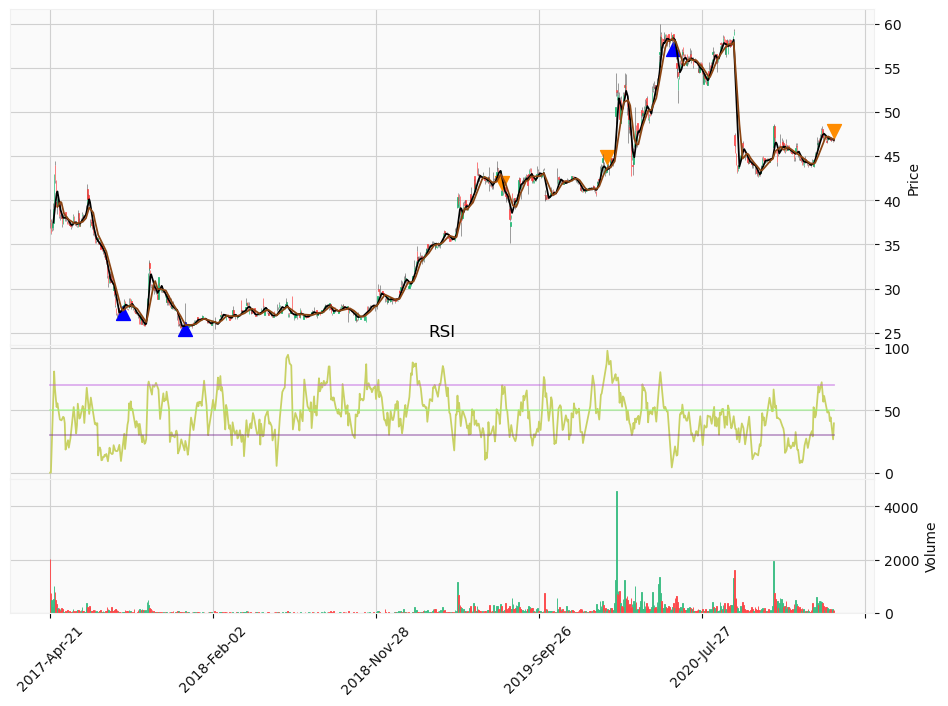

支出： 500000 元
收入： 578375 元
淨收益： 78375 元
投資報酬率： 15.68 %

 2236_2015.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


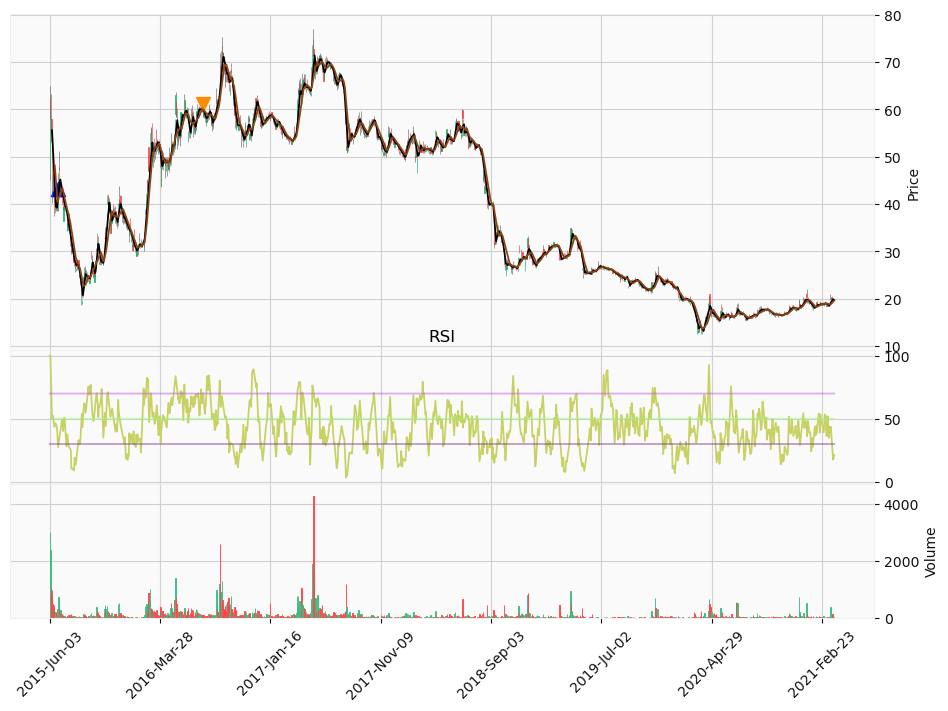

支出： 500000 元
收入： 637416 元
淨收益： 137416 元
投資報酬率： 27.48 %

 2330_2020.csv 



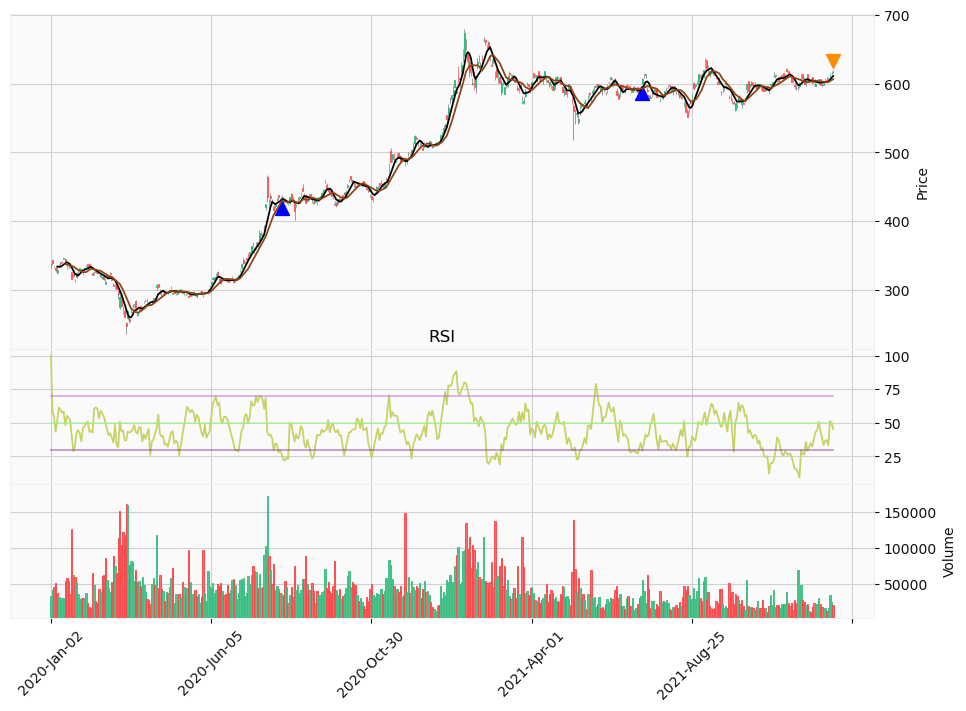

支出： 500000 元
收入： 701900 元
淨收益： 201900 元
投資報酬率： 40.38 %

 2603_2020.csv 



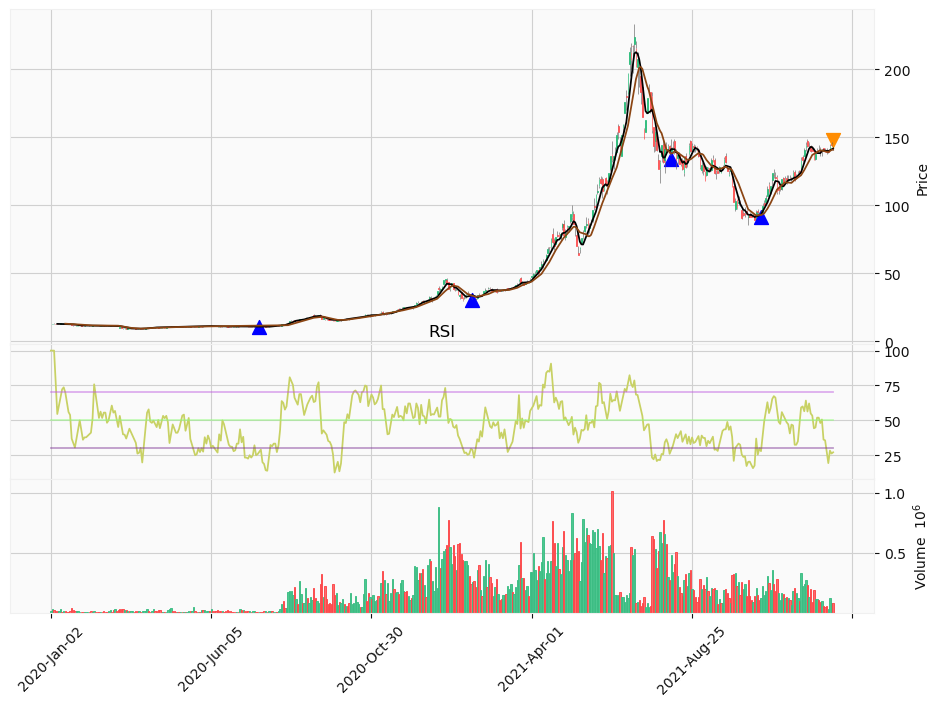

支出： 500000 元
收入： 6448539 元
淨收益： 5948539 元
投資報酬率： 1189.71 %

 2748_2016.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


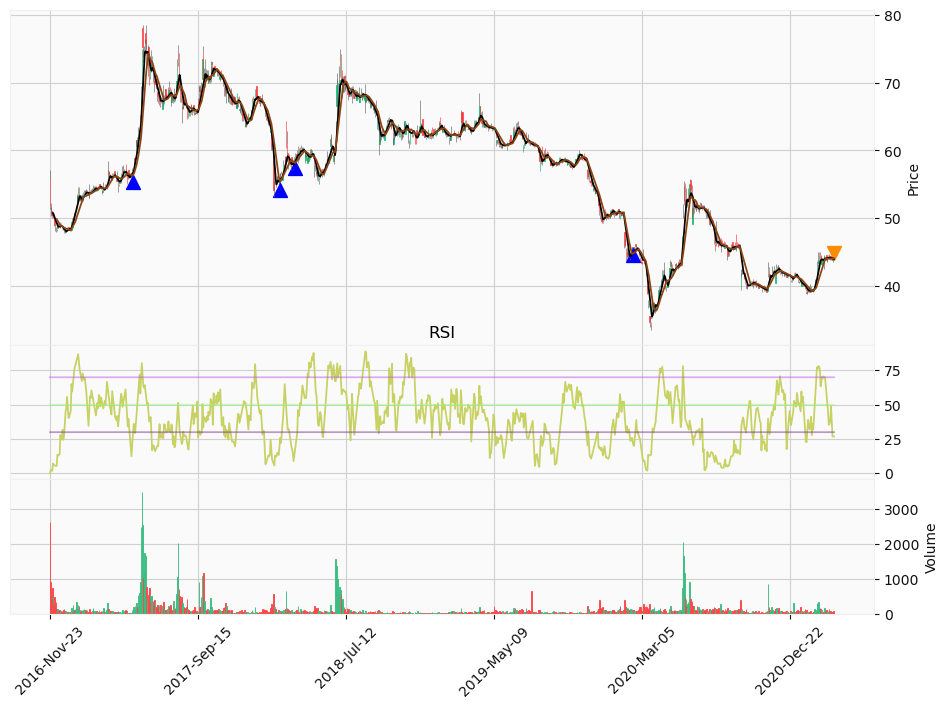

支出： 500000 元
收入： 382284 元
淨收益： -117716 元
投資報酬率： -23.54 %

 2886_2019.csv 



ValueError: zero-size array to reduction operation maximum which has no identity

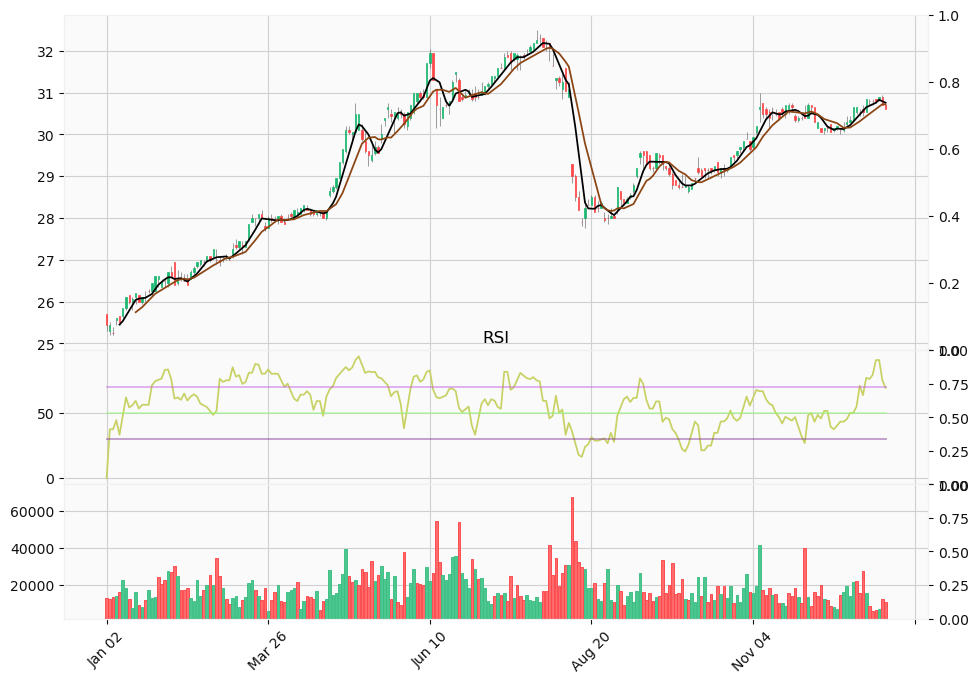

In [ ]:
# 策略一：RSI 天數 14 日將超賣跟超賣=70 超買=30

import numpy as np
import pandas as pd
import numpy as np
import mplfinance as mpf
import math
import os

path = os.getcwd()                                    # 取得此檔案當前的工作路徑
list_csv = os.listdir(path)                           # 取得此路徑中的所有檔案
lists = [file for file in list_csv if '.csv' in file] # 過濾出股價檔(.csv)
totalReturn = 0
result = []
indexList = []

for file in lists:
    print("\n",file,"\n")
    ticker = pd.read_csv(file)                                             # 讀取資料
    ticker.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']    # 設定股票資料欄位
    ticker = ticker.set_index('Date')                                      # 設定股票資料索引值
    ticker.index = pd.to_datetime(ticker.index)                            # 將索引值轉為 datetime 格式
    ticker = ticker.sort_index()                                           # 將資料以索引值排序

    def RSI_14(ticker):
        tmp = pd.DataFrame(index=ticker.index)            # 建立一個 tmp 用來存放計算的資料
        data = ticker.copy(deep=True)                     # 複製原始資料
        tmp['rise'] = ticker['Close'] - ticker['Open']    # 計算當日漲跌

        tmp['rise_only'] = tmp['rise']
        tmp['drop_only'] = tmp['rise']
        
        # 當 rise > 0 表示為漲，rise < 0 表示為跌
        tmp['rise_only'].loc[tmp['rise'] < 0] = 0
        tmp['drop_only'].loc[tmp['rise'] > 0] = 0

        # 計算過去 14 日漲幅與跌幅的平均
        tmp['rise_avg'] = tmp['rise_only'].rolling(14, min_periods=1).mean()
        tmp['drop_avg'] = tmp['drop_only'].rolling(14, min_periods=1).mean().abs()
        
        # 計算 RSI
        data['RSI'] = tmp['rise_avg'] / (tmp['rise_avg'] + tmp['drop_avg']) * 100

        return data   # 回傳更新後的資料
    
    def MA(data, MOVING_WINDOW_1, MOVING_WINDOW_2):
        data['ma_5'] = data['Close'].rolling(MOVING_WINDOW_1).mean()    # 計算 5 日 MA
        data['ma_10'] = data['Close'].rolling(MOVING_WINDOW_2).mean()    # 計算 10 日 MA
        
        return data
    
##############################################################################################################

    # 策略實現
    data = RSI_14(ticker)    # 計算該股票 14 日 RSI
    data = MA(data, 5, 10)    # 計算該股票 5 日及 10 日 MA 與 10 日 VMA
    
    upperBound = 70           # 超賣區
    lowerBound = 30           # 超買區
    middle_line = 50          # 中線

    initial = 500000          # 本金
    money = initial           # 剩餘金額
    stock = 0                 # 股票張數
    gain = 0                  # 目前獲利

    # 紀錄交易資訊
    detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利','剩餘金額']]
    temp_detail = []    # 暫存交易資訊

    # 初始化用來繪製買賣點
    points_buy = [np.nan] * len(data)    #買入點
    points_sell = [np.nan] * len(data)   #賣出點

    for i in range(14, data.shape[0]):                           # 略過沒有 RSI 的前 13 天

        if(data['RSI'][i] < lowerBound and                       # 當 RSI < 30
           (data['Close'][i] > data['Open'][i]) and              # 當日為紅 K
           (data.iloc[i]['ma_5'] > data.iloc[i]['ma_10']) and    # 當 5 日 MA 突破 10 日 MA
           (data.iloc[i-1]['ma_5'] < data.iloc[i-1]['ma_10']) and
           (data.iloc[i]['ma_5'] > data.iloc[i-1]['ma_5'])):     #今天的 ma_5 需大於昨天，防止兩條 ma 都下降的情況
                     

            points_buy[i] = data['Low'][i] * 0.98               # 將繪製的買入點設定於購買日最低價 * 0.98方便觀看
            price = round(data['Close'][i] * 1.001425, 1)       # 計算含稅的股價
            num = math.floor(money/price)                       # 計算能購買的股數(含稅)，無條件捨去小數點
            buy = round(num*price)                              # 計算實際花費
            money = money-buy                                   # 更新剩餘金額
            gain -= buy                                         # 淨收益計算(含稅)

            # 交易資訊
            temp_detail.append(data.index[i])                   # 紀錄交易日期
            temp_detail.append('+' + str(num))                  # 紀錄買入股數
            stock += num                                        # 更新目前持有股票張數
            temp_detail.append(data['Close'][i])                # 紀錄購買日買入價格，這邊假設為收盤價
            temp_detail.append(price)                           # 紀錄抽稅之後的價格
            temp_detail.append('-' + str(buy))                  # 紀錄實際花費 (四捨五入到個位數)
            temp_detail.append(gain)                            # 目前獲利
            temp_detail.append(money)                           # 剩餘金額
            detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
            temp_detail = []                                    # 清除暫存交易資訊

        if(data['RSI'][i] > upperBound and                      # 當 RSI > 70
           (data['Close'][i] > data['Open'][i]) and             # 當日為黑 K
           (data.iloc[i]['ma_5'] < data.iloc[i]['ma_10']) and   # 當 5 日 MA 跌破 10 日 MA
           (data.iloc[i-1]['ma_5'] > data.iloc[i-1]['ma_10']) and
           (data.iloc[i]['ma_5'] < data.iloc[i-1]['ma_5'])):    #今天的 ma_5 需小於昨天，防止兩條 ma 都上升的情況
                     
            points_sell[i] = data['High'][i] * 1.02             # 將繪製的賣出點設定於賣出日最高價 * 1.02方便觀看
            price = round(data['Close'][i] * 0.995575)          # 計算含稅的股價
            sell = round(data['Close'][i] * 0.995575 * stock)   # 將股票全數賣出
            money = money + sell                                # 更新剩餘金額
            gain += sell                                        # 淨收益計算
            
            # 交易資訊
            temp_detail.append(data.index[i])                   # 紀錄交易日期
            temp_detail.append('-' + str(stock))                # 紀錄賣出的股票數
            temp_detail.append(data['Close'][i])                # 紀錄賣出日賣出價格，這邊假設為收盤價
            temp_detail.append(price)                           # 紀錄抽稅之後的價格
            temp_detail.append('+' + str(sell))                 # 紀錄實際收入 (四捨五入到個位數)
            temp_detail.append(gain)                            # 紀錄目前獲利
            temp_detail.append(money)                           # 紀錄剩餘金額
            stock = 0                                           # 因為全部股票賣出，所以當前股票張數歸零
            detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
            temp_detail = []                                    # 清除暫存交易資訊


    if(stock!=0):                                               # 讀完所有資料後，若手頭還有股票將其全數賣出
            points_sell[i] = data['High'][i] * 1.02             # 將繪製的賣出點設定於賣出日最高價 * 1.02方便觀看
            price = round(data['Close'][i] * 0.995575)          # 計算含稅的股價
            sell = round(data['Close'][i] * 0.995575 * stock)   # 將股票全數賣出
            money = money + sell                                # 更新剩餘金額
            gain += sell                                        # 淨收益計算
            
            # 交易資訊
            temp_detail.append(data.index[i])                   # 紀錄交易日期
            temp_detail.append('-' + str(stock))                # 紀錄賣出的股票數
            temp_detail.append(data['Close'][i])                # 紀錄賣出日賣出價格，這邊假設為收盤價
            temp_detail.append(price)                           # 紀錄抽稅之後的價格
            temp_detail.append('+' + str(sell))                 # 紀錄實際收入 (四捨五入到個位數)
            temp_detail.append(gain)                            # 紀錄目前獲利
            temp_detail.append(money)                           # 紀錄剩餘金額
            detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
            temp_detail = []                                    # 清除暫存交易資訊
            
 
    plots = [
        # 添加RSI指標
        mpf.make_addplot(data['RSI'], panel = 1, color='#c8d164', title='RSI'),

        # 添加超買超賣線及中線
        mpf.make_addplot(np.full((len(data)), upperBound), panel = 1, color='#bf5ce0', alpha=0.5),
        mpf.make_addplot(np.full((len(data)), lowerBound), panel = 1, color='#7e3696', alpha=0.5),
        mpf.make_addplot(np.full((len(data)), middle_line), panel = 1, color='#8eff75', alpha=0.5),
         
        # 添加 5 日、10 日 MA
        mpf.make_addplot(data['ma_5'], color = 'black'),
        mpf.make_addplot(data['ma_10'], color = 'saddlebrown'),
         
        # 添加買賣點
        mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
        mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
        ]

    mpf.plot( data, 
                type='candle',       # 以 candle 格式畫出股價
                volume=True,         # 顯示成交量
                volume_panel=2,      # 版面數 = 2
                figscale=1.5,        # 將圖片放大 1.5 倍
                style='yahoo',       # 設定色彩格式
                addplot = plots      # 加上自定義的線
                )      


    detail = pd.DataFrame(detail)
    detail

    # 顯示支出、收入、淨收益、投資報酬率
    cost = initial
    income = money
    returnRate = round(100 * (income - cost) / cost, 2)
    print("支出：", cost, "元")
    print("收入：", income, "元")
    print("淨收益：", income - cost, "元")
    print("投資報酬率：", returnRate, "%")
    result.append([cost, income, income-cost, str(returnRate)+' %'])
    indexList.append(file[:-4])
    
    totalReturn += returnRate
    
print("\n總報酬率：", round(totalReturn, 2), " %")
result.append(['', '', '', str(round(totalReturn, 2))+' %'])
indexList.append('總投資報酬率')
result = pd.DataFrame(result, columns=['支出', '收入', '淨收益', '投資報酬率'], index=indexList)
result
    

## K>D>50、MA交叉、賣出帶量


 0050_2018.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


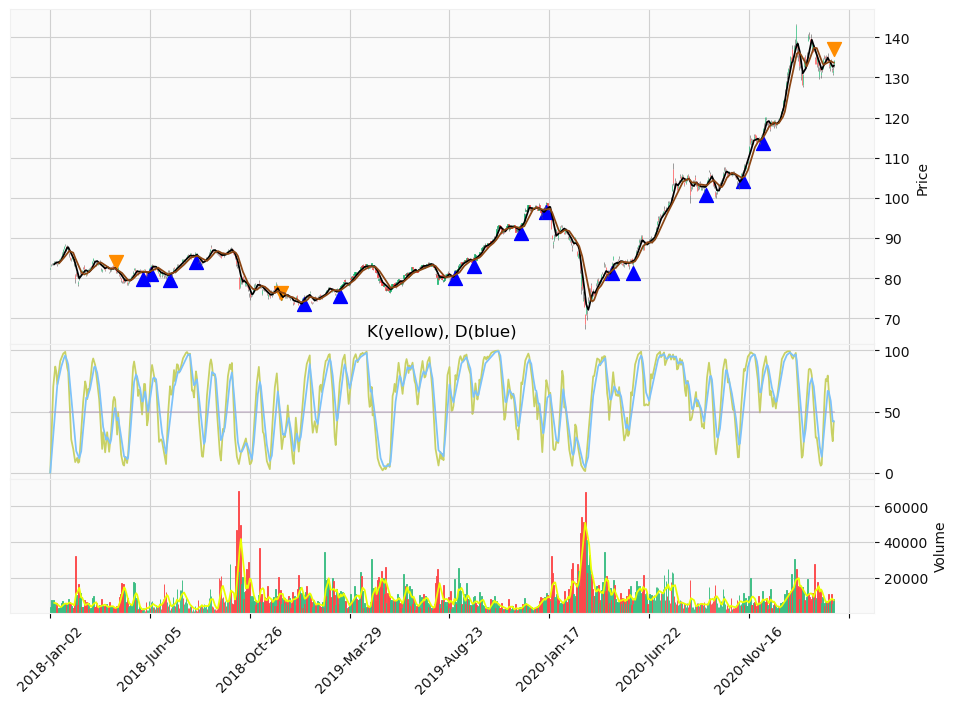

支出： 500000 元
收入： 799612 元
淨收益： 299612 元
投資報酬率： 59.92 %

 1304_2011.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


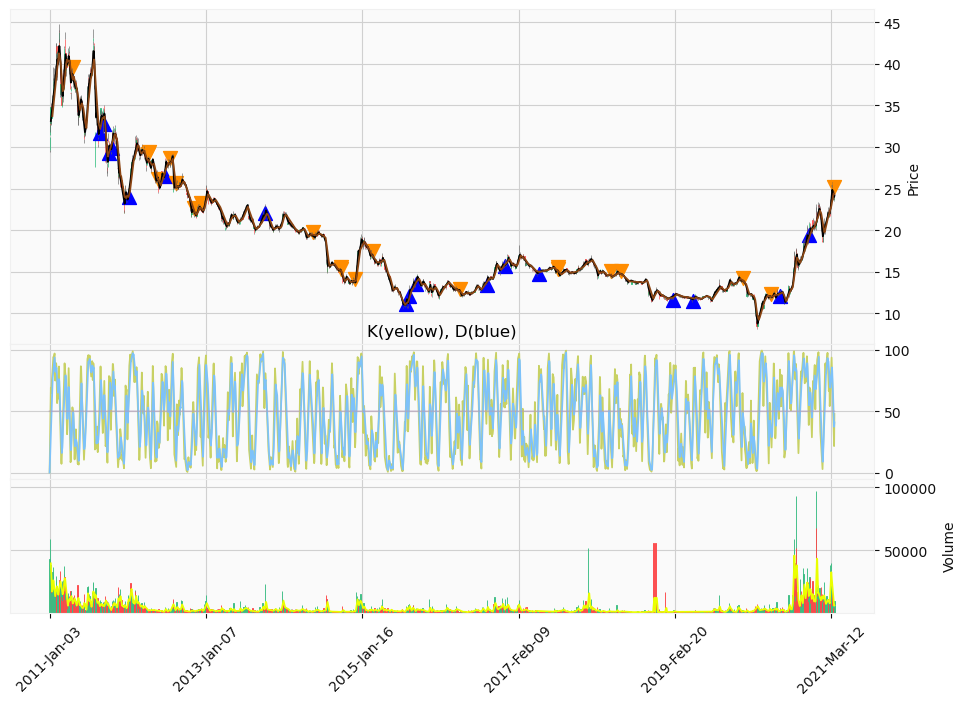

支出： 500000 元
收入： 870399 元
淨收益： 370399 元
投資報酬率： 74.08 %

 1762_2010.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


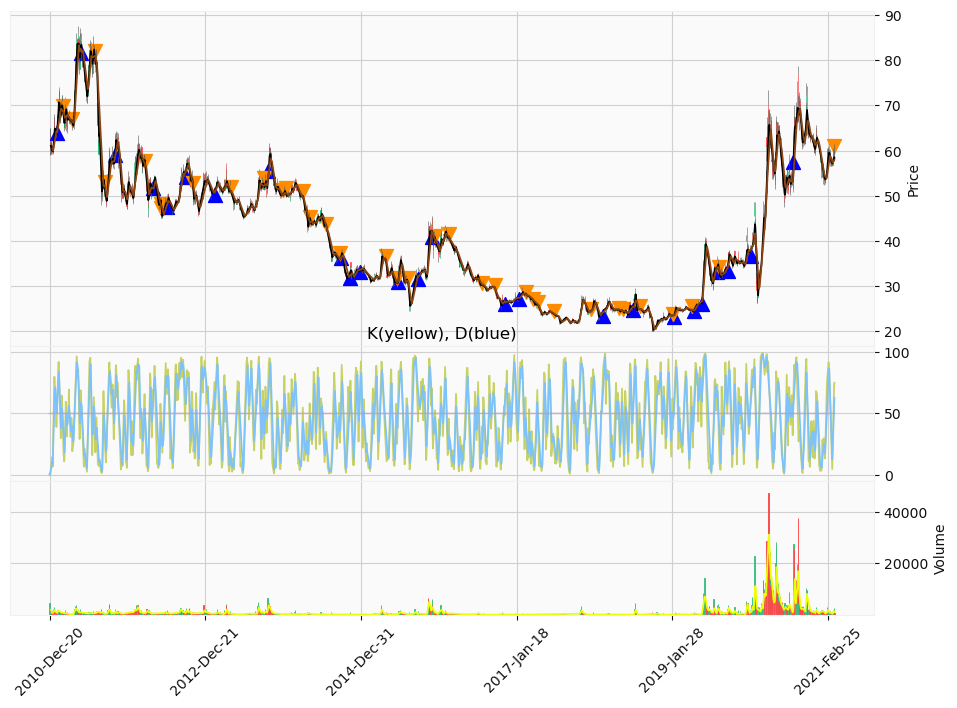

支出： 500000 元
收入： 582886 元
淨收益： 82886 元
投資報酬率： 16.58 %

 2065_2017.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


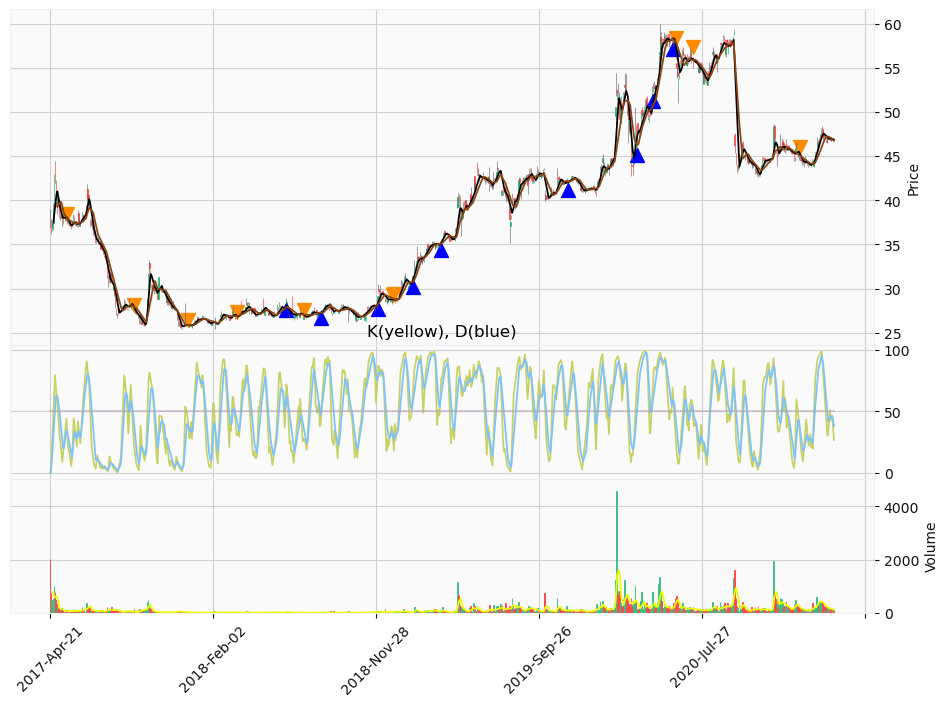

支出： 500000 元
收入： 866810 元
淨收益： 366810 元
投資報酬率： 73.36 %

 2236_2015.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


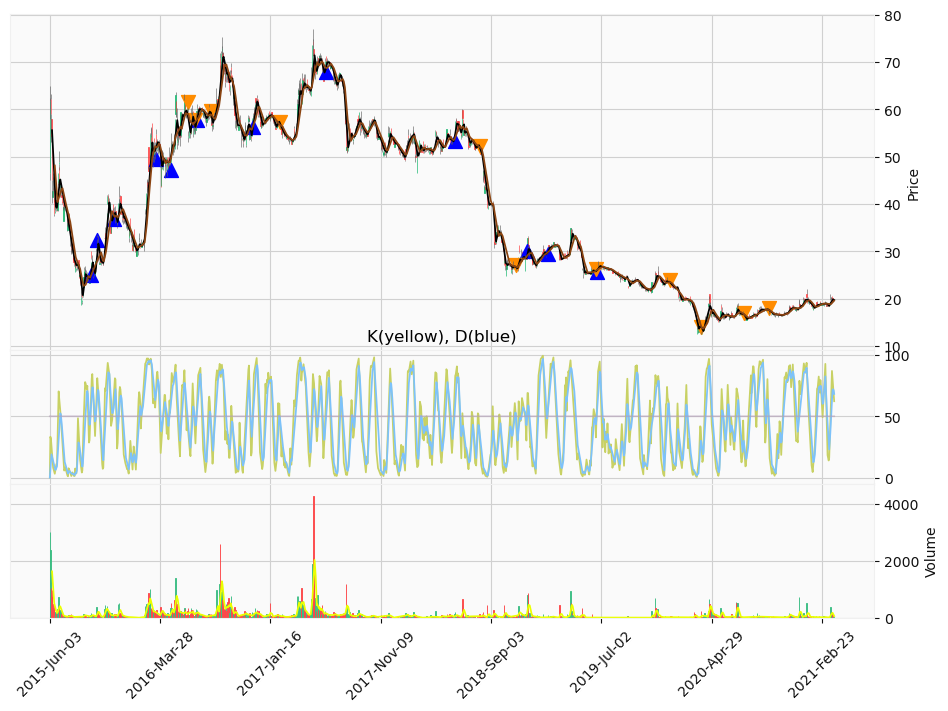

支出： 500000 元
收入： 474260 元
淨收益： -25740 元
投資報酬率： -5.15 %

 2330_2020.csv 



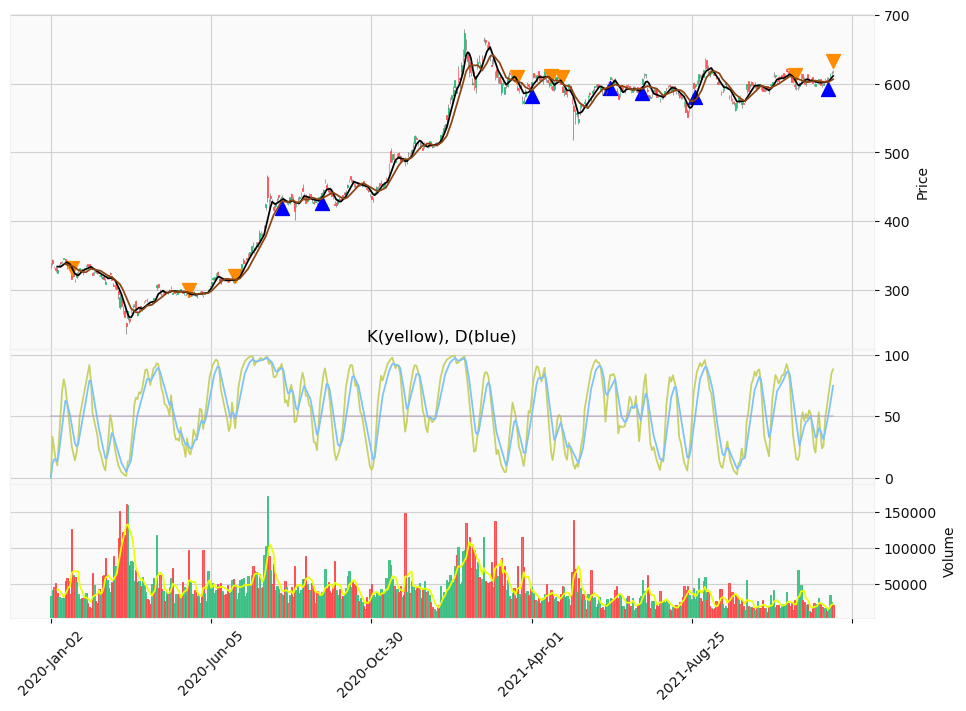

支出： 500000 元
收入： 647212 元
淨收益： 147212 元
投資報酬率： 29.44 %

 2603_2020.csv 



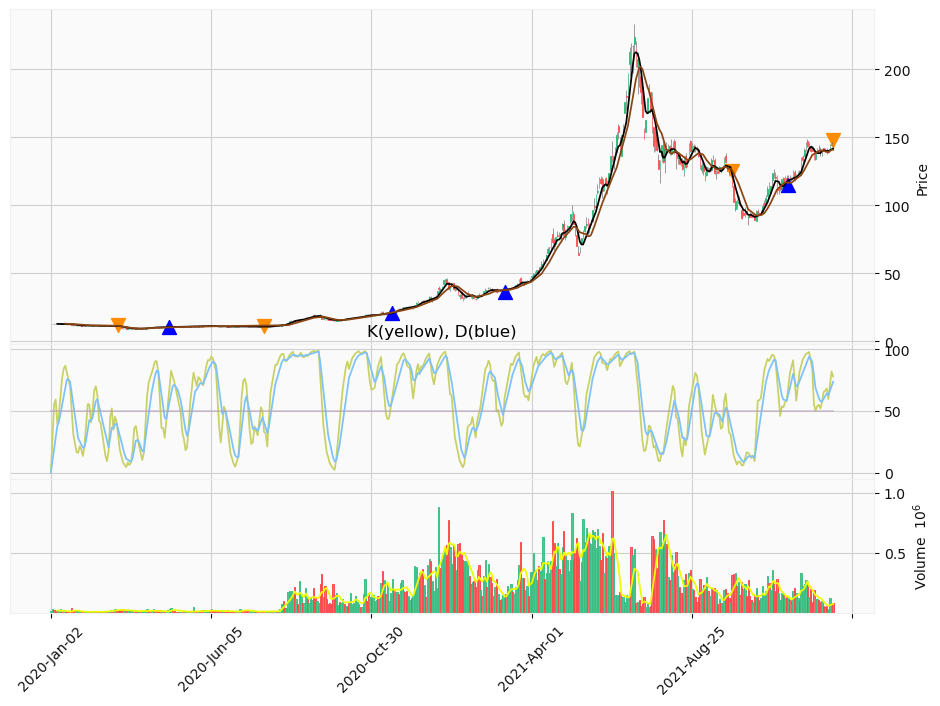

支出： 500000 元
收入： 2962854 元
淨收益： 2462854 元
投資報酬率： 492.57 %

 2748_2016.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


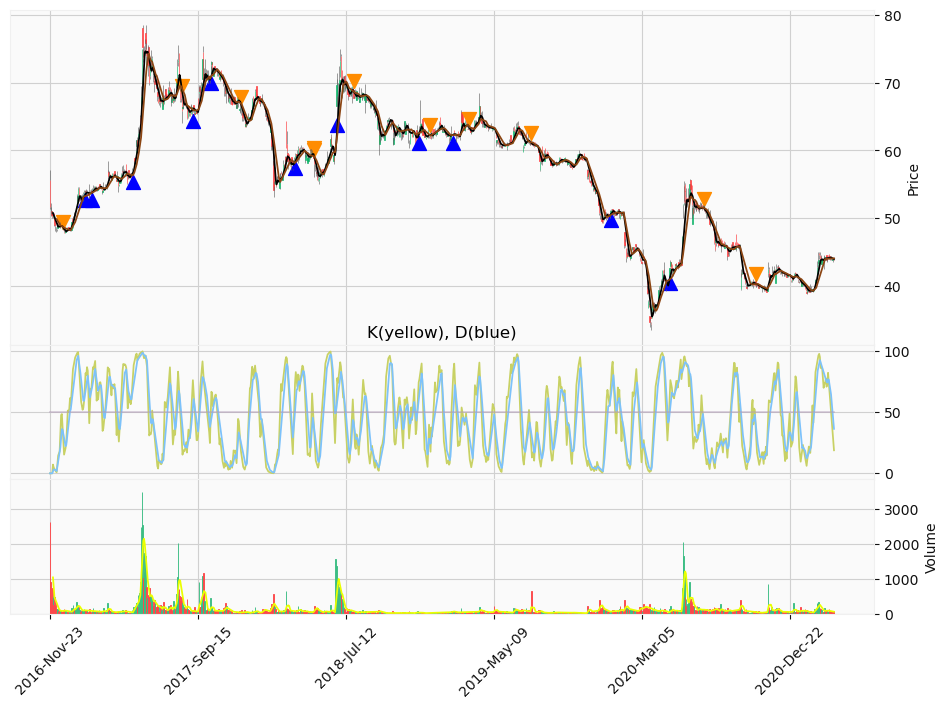

支出： 500000 元
收入： 560558 元
淨收益： 60558 元
投資報酬率： 12.11 %

 2886_2019.csv 



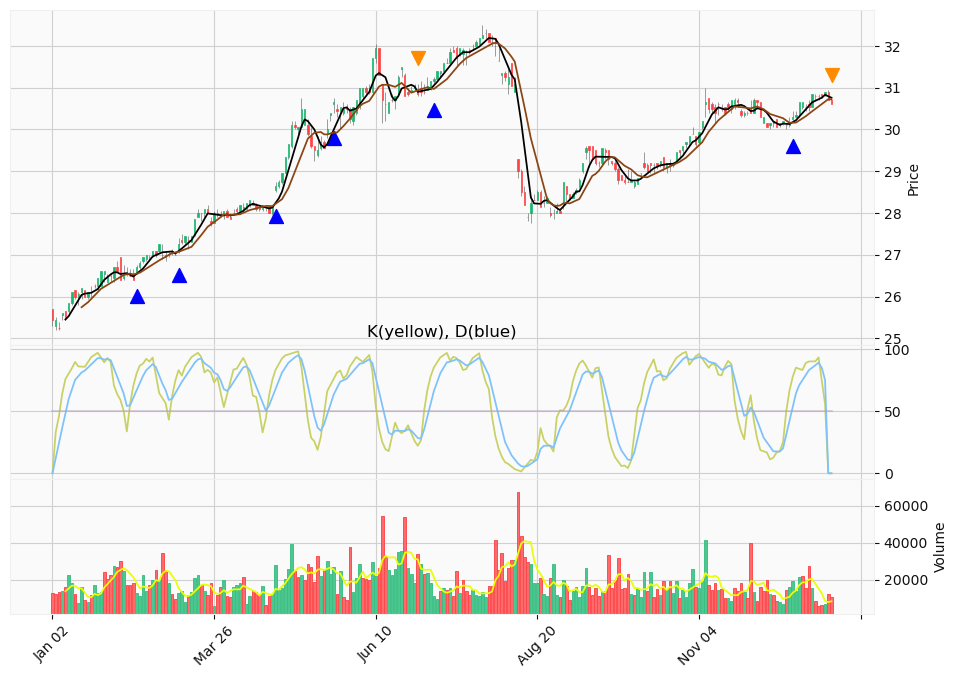

支出： 500000 元
收入： 561600 元
淨收益： 61600 元
投資報酬率： 12.32 %

 2926_2013.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


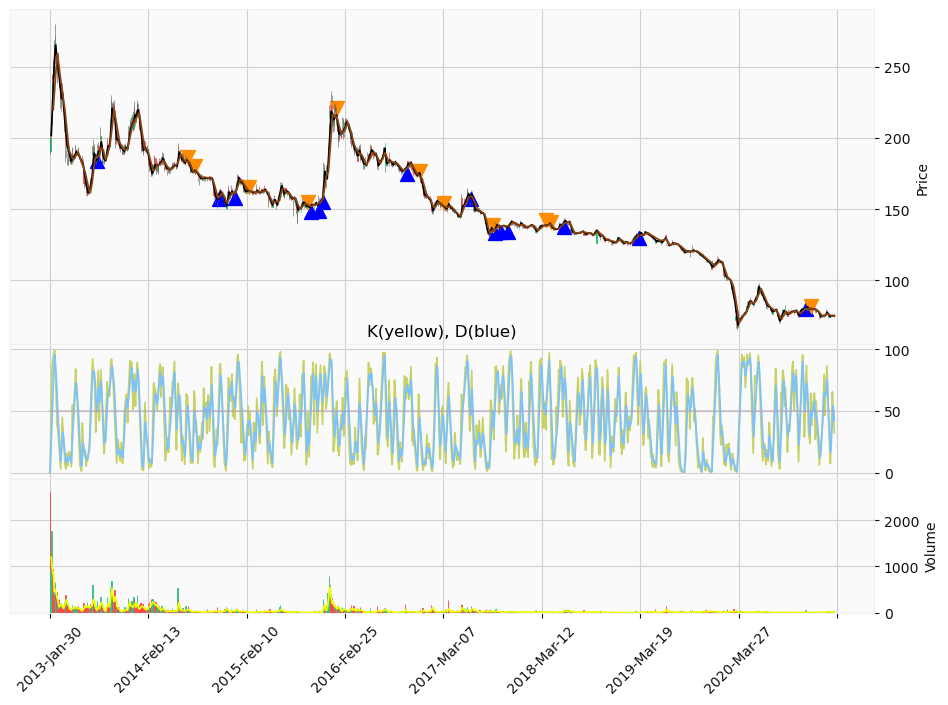

支出： 500000 元
收入： 258527 元
淨收益： -241473 元
投資報酬率： -48.29 %

總報酬率： 716.94  %


支出       收入      淨收益     投資報酬率
0050_2018  500000   799612   299612   59.92 %
1304_2011  500000   870399   370399   74.08 %
1762_2010  500000   582886    82886   16.58 %
2065_2017  500000   866810   366810   73.36 %
2236_2015  500000   474260   -25740   -5.15 %
2330_2020  500000   647212   147212   29.44 %
2603_2020  500000  2962854  2462854  492.57 %
2748_2016  500000   560558    60558   12.11 %
2886_2019  500000   561600    61600   12.32 %
2926_2013  500000   258527  -241473  -48.29 %
總投資報酬率                               716.94 %

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import mplfinance as mpf
import math
import os

path = os.getcwd()                                    # 取得此檔案當前的工作路徑
list_csv = os.listdir(path)                           # 取得此路徑中的所有檔案
lists = [file for file in list_csv if '.csv' in file] # 過濾出股價檔(.csv)
totalReturn = 0
result = []
indexList = []

for file in lists:
    print("\n",file,"\n")
    ticker = pd.read_csv(file)                                             # 讀取資料
    ticker.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']    # 設定股票資料欄位
    ticker = ticker.set_index('Date')                                      # 設定股票資料索引值
    ticker.index = pd.to_datetime(ticker.index)                            # 將索引值轉為 datetime 格式
    ticker = ticker.sort_index()                                           # 將資料以索引值排序

    def KD(KD_n, ticker):
        tmp = pd.DataFrame(index=ticker.index)            # 建立一個 tmp 用來存放計算的資料
        data = ticker.copy(deep=True)                     # 複製原始資料

        tmp['max_close'] = ticker['Close'].rolling(KD_n, min_periods=1).max()    # 記錄前九日最高的收盤價
        tmp['min_close'] = ticker['Close'].rolling(KD_n, min_periods=1).min()    # 記錄前九日最低的收盤價
        tmp['RSV'] = (ticker['Close'] - tmp['min_close'])/(tmp['max_close']-tmp['min_close'])*100    # 計算 RSV

        if str(tmp['RSV'][1]) == 'nan':    # 第 0 列的 RSV 通常為 nan，而因為其中一支出現了第 1 列為 NaN 的情況
                                           #，因此特別將含有 NaN 的資料刪去
            tmp = tmp.dropna()
        
        # 建立兩個為 0 的陣列用來存放 K, D 值
        data['k'] = np.zeros(ticker.shape[0])
        data['d'] = np.zeros(ticker.shape[0])
        
        for i in range(1, tmp.shape[0]):   # 跳過第 1 筆資料，因為 RSV 為 NaN
            # 計算 K, D 值
            data.loc[(data.index[i], 'k')] = data['k'][i-1] * (2/3) + tmp['RSV'][i] * (1/3)
            data.loc[(data.index[i], 'd')] = data['d'][i-1] * (2/3) + data['k'][i] * (1/3)

        return data

    def MA(data, MOVING_WINDOW_1, MOVING_WINDOW_2):
        data['ma_5'] = data['Close'].rolling(MOVING_WINDOW_1).mean()     # 計算 5 日 MA
        data['ma_10'] = data['Close'].rolling(MOVING_WINDOW_2).mean()    # 計算 10 日 MA
        data['vol_5'] = data['Volume'].rolling(MOVING_WINDOW_1).mean()   # 計算 5 日 VMA

        return data
    
##############################################################################################################

    # 策略實現
    data = KD(9, ticker)      # 計算該股票 9 日 KD
    data = MA(data, 5, 10)    # 計算該股票 5 日及 10 日 MA 與 10 日 VMA

    initial = 500000          # 本金
    money = initial           # 剩餘金額
    stock = 0                 # 股票張數
    gain = 0                  # 目前獲利

    # 紀錄交易資訊
    detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利','剩餘金額']]
    temp_detail = []    # 暫存交易資訊

    # 初始化用來繪製買賣點
    points_buy = [np.nan] * len(data)    #買入點
    points_sell = [np.nan] * len(data)   #賣出點
    
    for i in range(9, data.shape[0]):    # 略過沒有 KD 的前 8 天

        if(data['k'][i] > data['d'][i] > 50 and     # 當 K > D > 50 及
           data['Close'][i] > data['Open'][i] and   # 當日為紅 K
           (data.iloc[i]['ma_5'] > data.iloc[i]['ma_10']) and      # 當 5 日 MA 突破 10 日 MA
           (data.iloc[i-1]['ma_5'] < data.iloc[i-1]['ma_10']) and
           (data.iloc[i]['ma_5'] > data.iloc[i-1]['ma_5'])):       #今天的 ma_5 需大於昨天，防止兩條 ma 都下降的情況

                points_buy[i] = data['Low'][i] * 0.98               # 將繪製的買入點設定於購買日最低價 * 0.98方便觀看
                price = round(data['Close'][i] * 1.001425, 1)       # 計算含稅的股價
                num = math.floor(money/price)                       # 計算能購買的股數(含稅)，無條件捨去小數點
                buy = round(num*price)                              # 計算實際花費
                money = money-buy                                   # 更新剩餘金額
                gain -= buy                                         # 淨收益計算(含稅)

                # 交易資訊
                temp_detail.append(data.index[i])                   # 紀錄交易日期
                temp_detail.append('+' + str(num))                  # 紀錄買入股數
                stock += num                                        # 更新目前持有股票張數
                temp_detail.append(data['Close'][i])                # 紀錄購買日買入價格，這邊假設為收盤價
                temp_detail.append(price)                           # 紀錄抽稅之後的價格
                temp_detail.append('-' + str(buy))                  # 紀錄實際花費 (四捨五入到個位數)
                temp_detail.append(gain)                            # 目前獲利
                temp_detail.append(money)                           # 剩餘金額
                detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
                temp_detail = []                                    # 清除暫存交易資訊

        if(data['k'][i] < data['d'][i] < 50 and                     # 當 K < D < 50 及
           data['Close'][i] < data['Open'][i] and                   # 當日為黑 K
           data['Volume'][i] > data['vol_5'][i] and                 # 當成交量 > 5 日均量才交易，避免交叉線反復來回造成的誤判
           (data.iloc[i-1]['ma_5'] > data.iloc[i-1]['ma_10']) and   # 當 5 日 MA 跌破 10 日 MA
           (data.iloc[i]['ma_5'] < data.iloc[i-1]['ma_5'])):

                points_sell[i] = data['High'][i] * 1.02             # 將繪製的賣出點設定於賣出日最高價 * 1.02方便觀看
                price = round(data['Close'][i] * 0.995575)          # 計算含稅的股價
                sell = round(data['Close'][i] * 0.995575 * stock)   # 將股票全數賣出
                money = money + sell                                # 更新剩餘金額
                gain += sell                                        # 淨收益計算

                # 交易資訊
                temp_detail.append(data.index[i])                   # 紀錄交易日期
                temp_detail.append('-' + str(stock))                # 紀錄賣出的股票數
                temp_detail.append(data['Close'][i])                # 紀錄賣出日賣出價格，這邊假設為收盤價
                temp_detail.append(price)                           # 紀錄抽稅之後的價格
                temp_detail.append('+' + str(sell))                 # 紀錄實際收入 (四捨五入到個位數)
                temp_detail.append(gain)                            # 紀錄目前獲利
                temp_detail.append(money)                           # 紀錄剩餘金額
                stock = 0                                           # 因為全部股票賣出，所以當前股票張數歸零
                detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
                temp_detail = []                                    # 清除暫存交易資訊


    if(stock!=0):                                               # 讀完所有資料後，若手頭還有股票將其全數賣出
            points_sell[i] = data['High'][i] * 1.02             # 將繪製的賣出點設定於賣出日最高價 * 1.02方便觀看
            price = round(data['Close'][i] * 0.995575)          # 計算含稅的股價
            sell = round(data['Close'][i] * 0.995575 * stock)   # 將股票全數賣出
            money = money + sell                                # 更新剩餘金額
            gain += sell                                        # 淨收益計算
            
            # 交易資訊
            temp_detail.append(data.index[i])                   # 紀錄交易日期
            temp_detail.append('-' + str(stock))                # 紀錄賣出的股票數
            temp_detail.append(data['Close'][i])                # 紀錄賣出日賣出價格，這邊假設為收盤價
            temp_detail.append(price)                           # 紀錄抽稅之後的價格
            temp_detail.append('+' + str(sell))                 # 紀錄實際收入 (四捨五入到個位數)
            temp_detail.append(gain)                            # 紀錄目前獲利
            temp_detail.append(money)                           # 紀錄剩餘金額
            detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
            temp_detail = []                                    # 清除暫存交易資訊
            
            
    plots = [
            # 添加 KD 指標
            mpf.make_addplot(data['k'], panel = 1, color='#c8d164', title='K(yellow), D(blue)'),
            mpf.make_addplot(data['d'], panel = 1, color='#7dc2fa'),
            mpf.make_addplot(np.full((len(data['d'])), 50), panel = 1, color='#b19ab8', alpha=0.5),

            # 添加買賣點
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            # 添加 5 日、10 日 MA
            mpf.make_addplot(data['ma_5'], color = 'black'),
            mpf.make_addplot(data['ma_10'], color = 'saddlebrown'),
        
            # 添加 10 日均量線
            mpf.make_addplot(data['vol_5'], panel = 2, color='#eaff00'),
            ]

    mpf.plot( data, 
                type='candle',       # 以 candle 格式畫出股價
                volume=True,         # 顯示成交量
                volume_panel=2,      # 版面數 = 2
                figscale=1.5,        # 將圖片放大 1.5 倍
                style='yahoo',       # 設定色彩格式
                addplot = plots      # 加上自定義的線
                )        


    detail = pd.DataFrame(detail)
    detail

    # 顯示支出、收入、淨收益、投資報酬率
    cost = initial
    income = money
    returnRate = round(100 * (income - cost) / cost, 2)
    print("支出：", cost, "元")
    print("收入：", income, "元")
    print("淨收益：", income - cost, "元")
    print("投資報酬率：", returnRate, "%")
    result.append([cost, income, income-cost, str(returnRate)+' %'])
    indexList.append(file[:-4])
    
    totalReturn += returnRate
    
print("\n總報酬率：", round(totalReturn, 2), " %")
result.append(['', '', '', str(round(totalReturn, 2))+' %'])
indexList.append('總投資報酬率')
result = pd.DataFrame(result, columns=['支出', '收入', '淨收益', '投資報酬率'], index=indexList)
result
    

## MACD 突破零軸 + 股價 > 20 日均價 


 0050_2018.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


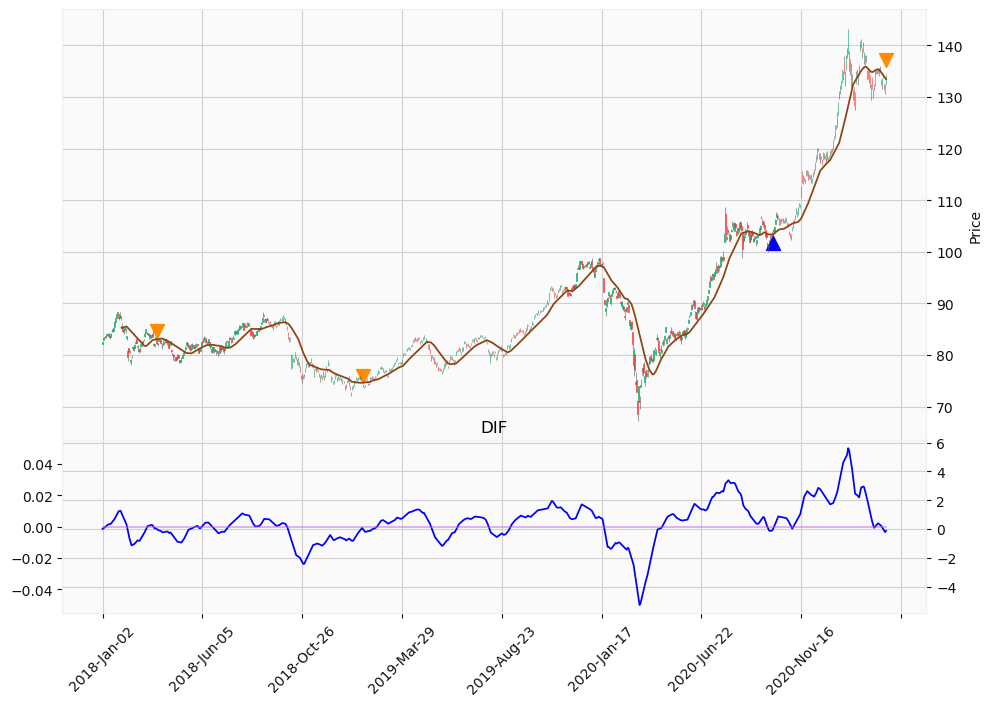

支出： 500000 元
收入： 640583 元
淨收益： 140583 元
投資報酬率： 28.12 %

 1304_2011.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


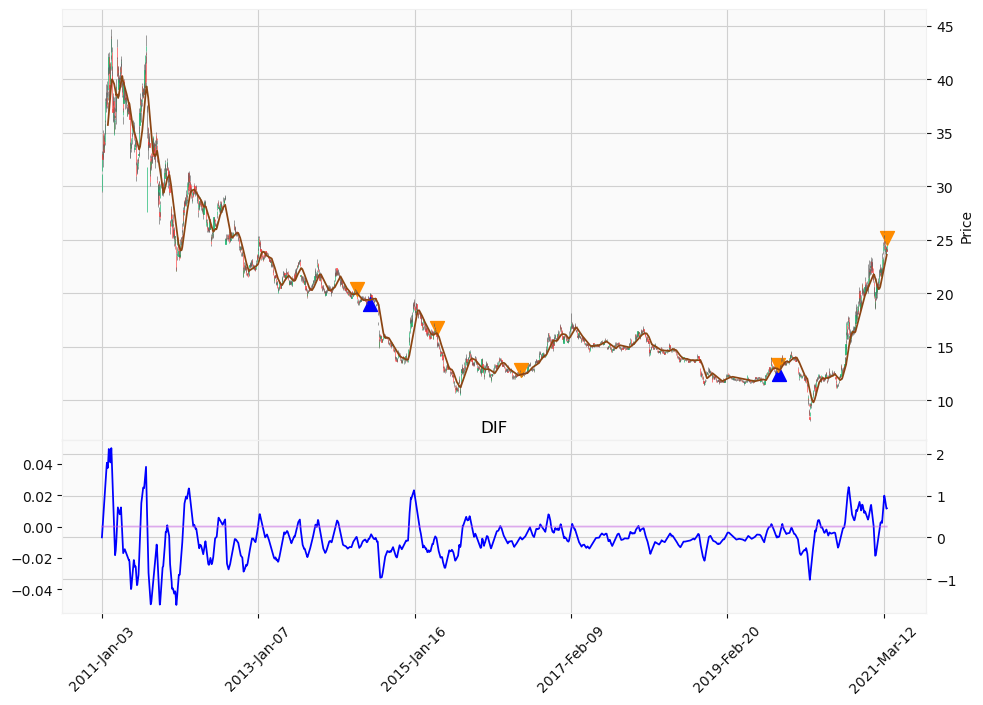

支出： 500000 元
收入： 759353 元
淨收益： 259353 元
投資報酬率： 51.87 %

 1762_2010.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


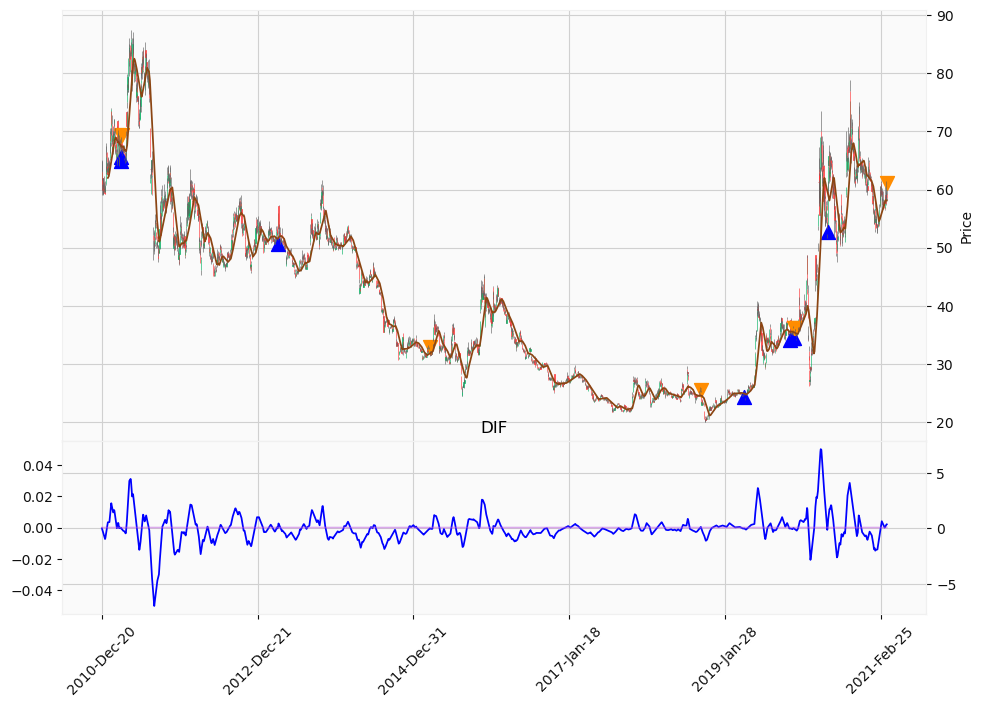

支出： 500000 元
收入： 390780 元
淨收益： -109220 元
投資報酬率： -21.84 %

 2065_2017.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


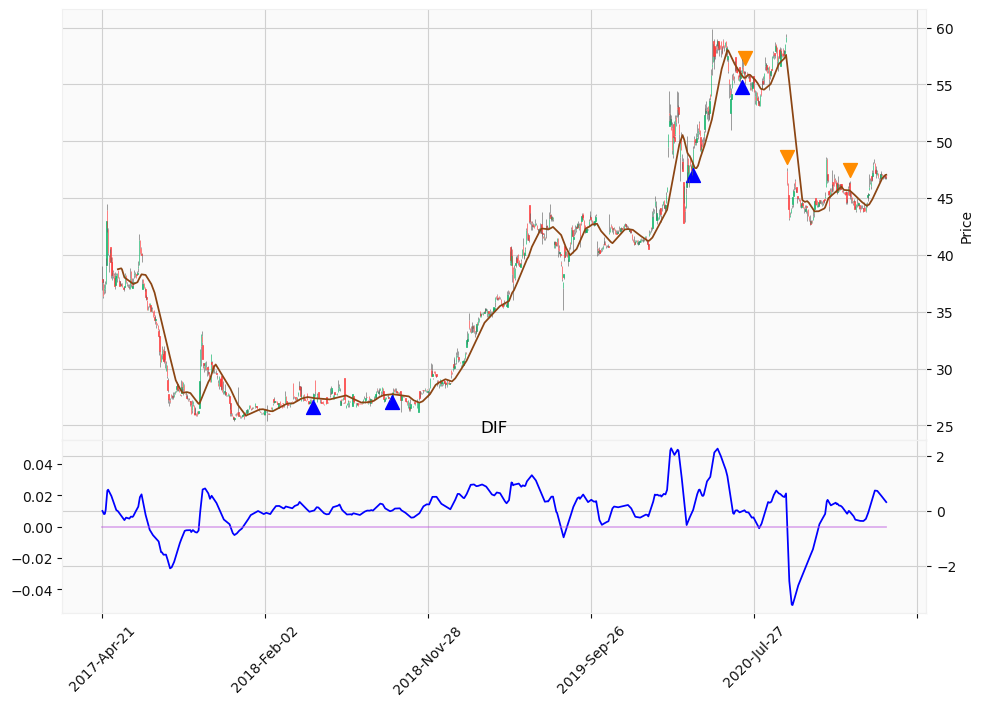

支出： 500000 元
收入： 990187 元
淨收益： 490187 元
投資報酬率： 98.04 %

 2236_2015.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


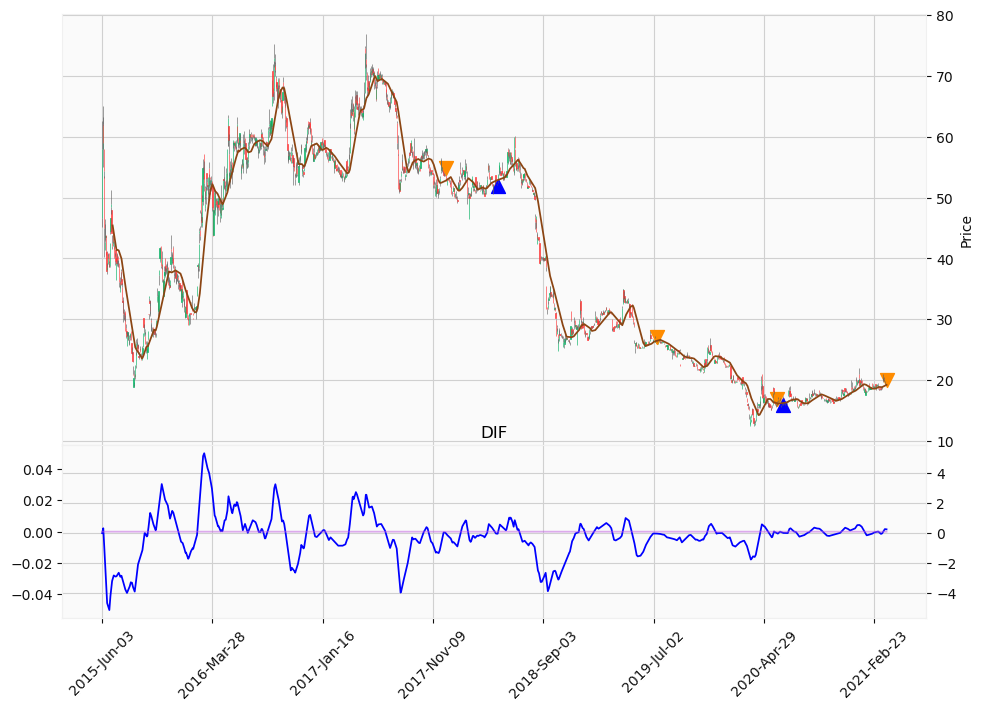

支出： 500000 元
收入： 279050 元
淨收益： -220950 元
投資報酬率： -44.19 %

 2330_2020.csv 



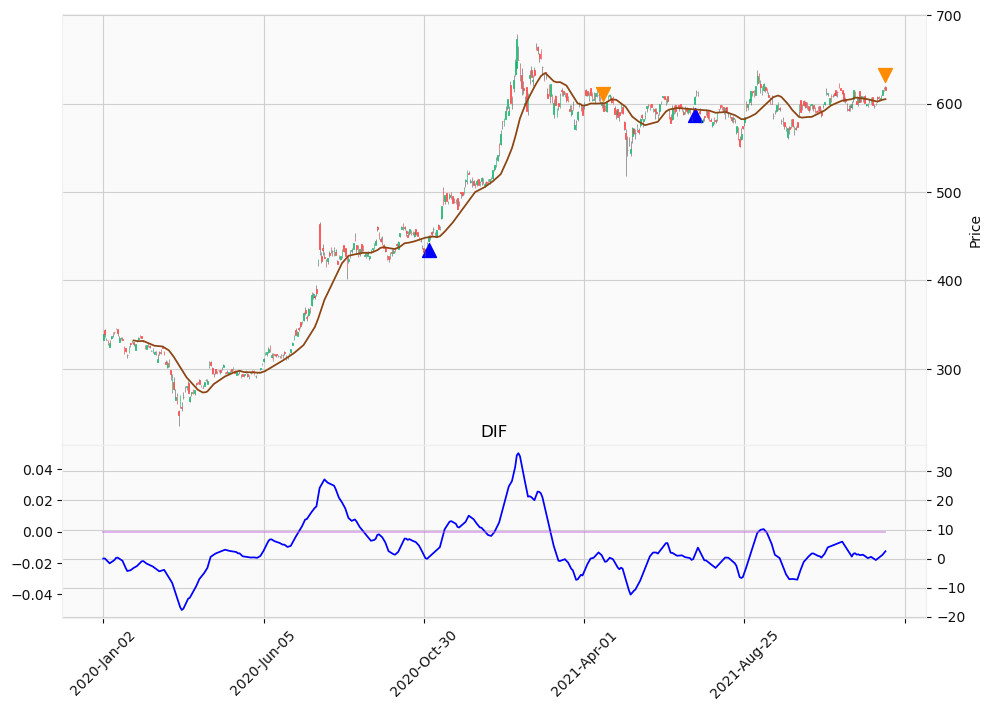

支出： 500000 元
收入： 658616 元
淨收益： 158616 元
投資報酬率： 31.72 %

 2603_2020.csv 



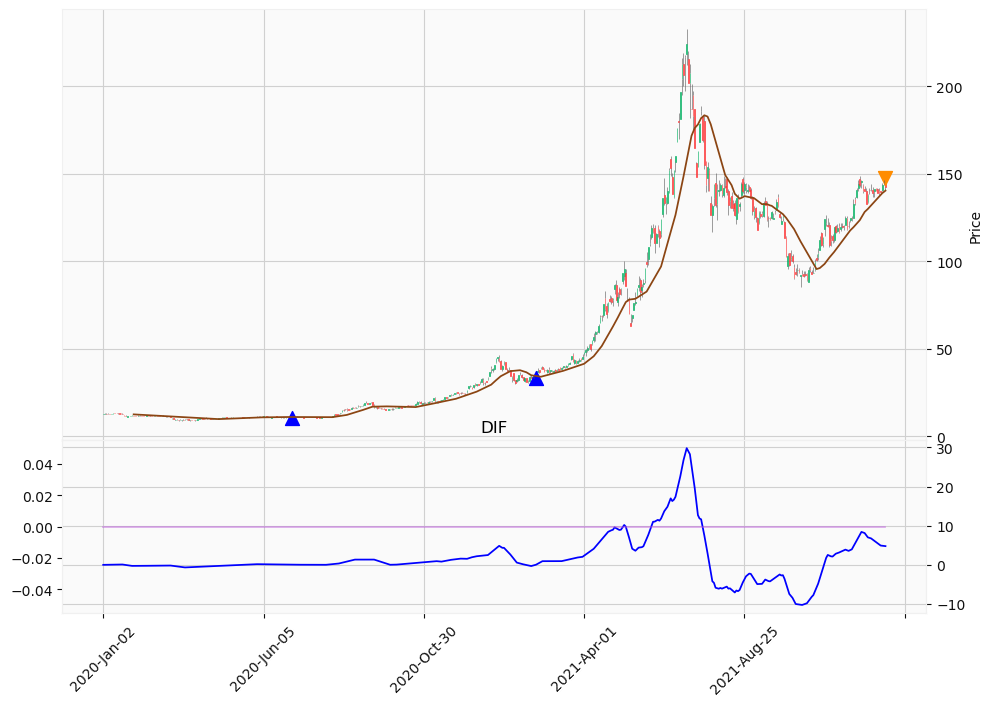

支出： 500000 元
收入： 6333345 元
淨收益： 5833345 元
投資報酬率： 1166.67 %

 2748_2016.csv 



C:\Users\evyhsiao\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


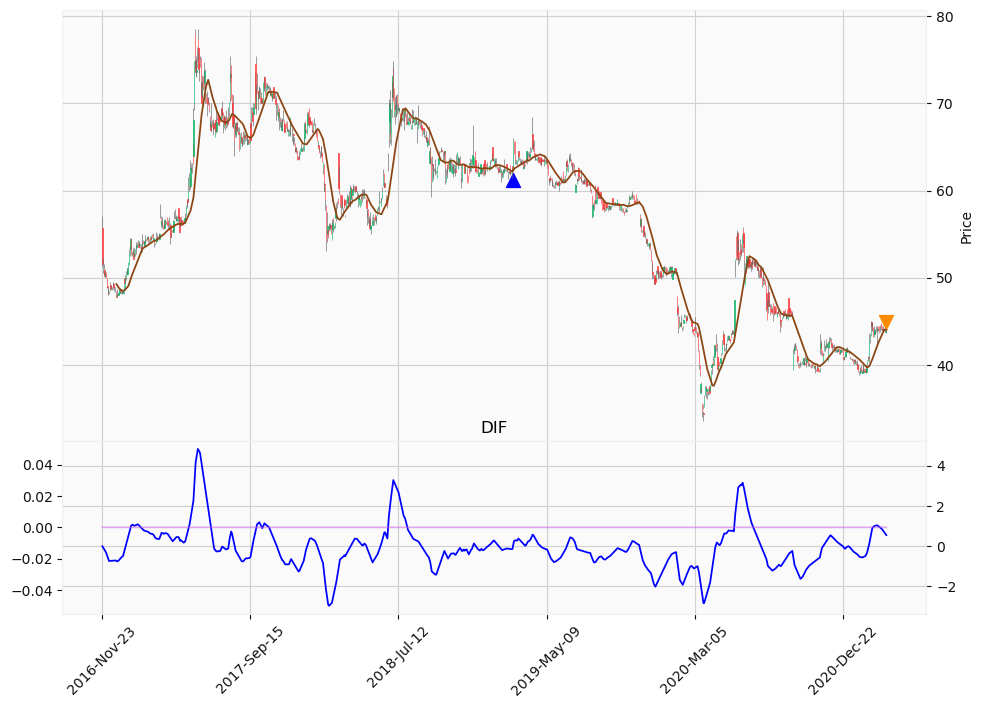

支出： 500000 元
收入： 331750 元
淨收益： -168250 元
投資報酬率： -33.65 %

 2886_2019.csv 



ValueError: zero-size array to reduction operation maximum which has no identity

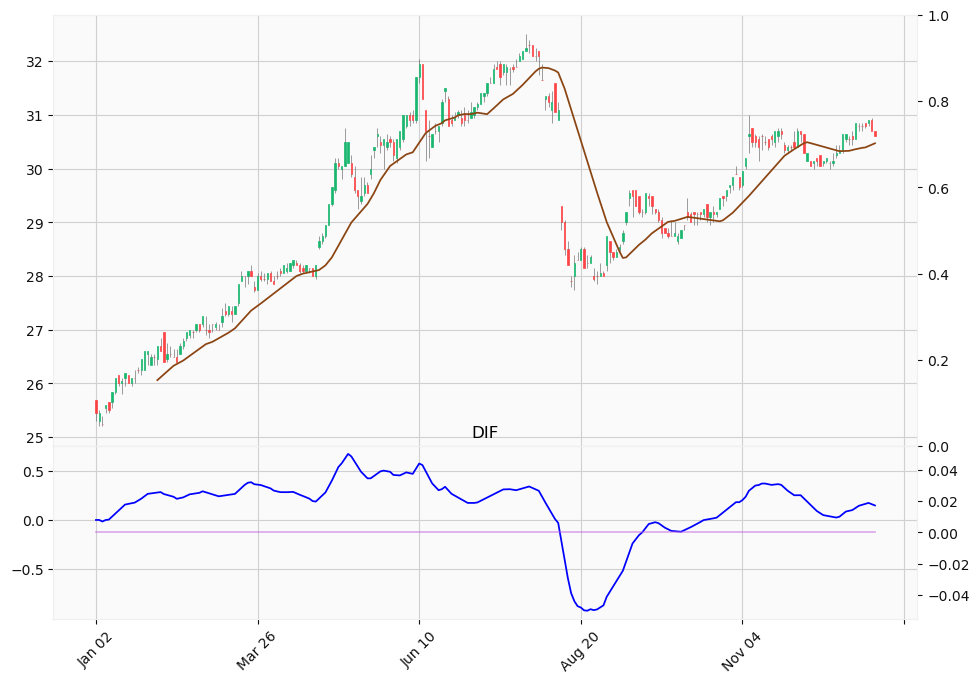

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import mplfinance as mpf
import math
import os

path = os.getcwd()                                    # 取得此檔案當前的工作路徑
list_csv = os.listdir(path)                           # 取得此路徑中的所有檔案
lists = [file for file in list_csv if '.csv' in file] # 過濾出股價檔(.csv)
totalReturn = 0
result = []
indexList = []

for file in lists:
    print("\n",file,"\n")
    ticker = pd.read_csv(file)                                             # 讀取資料
    ticker.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']    # 設定股票資料欄位
    ticker = ticker.set_index('Date')                                      # 設定股票資料索引值
    ticker.index = pd.to_datetime(ticker.index)                            # 將索引值轉為 datetime 格式
    ticker = ticker.sort_index()                                           # 將資料以索引值排序
      
    def MACD(ticker):
        tmp = pd.DataFrame(index=ticker.index)            # 建立一個 tmp 用來存放計算的資料
        data = ticker.copy(deep=True)                     # 複製原始資料
        
        tmp['ema12'] = ticker['Close'].ewm(span=12, adjust=False).mean() # 計算 12 日快速平滑移動平均線
        tmp['ema26'] = ticker['Close'].ewm(span=26, adjust=False).mean() # 計算 26 日慢速平滑移動平均線

#         tmp = tmp.dropna()
        data['macd_DIF']  = tmp['ema12'] - tmp['ema26']    # 計算快線曼線差
        
        return data

    def MA(data):
        data['ma_20'] = data['Close'].rolling(20).mean()    # 計算 20 日 MA
          
        return data

##################################################################################

    # 策略實現
    data = MACD(ticker)    # 計算該股票 12、26 日快速平滑移動平均線差
    data = MA(data)        # 計算該股票 20 日 MA

    initial = 500000          # 本金
    money = initial           # 剩餘金額
    stock = 0                 # 股票張數
    gain = 0                  # 目前獲利

    # 紀錄交易資訊
    detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利','剩餘金額']]
    temp_detail = []    # 暫存交易資訊

    # 初始化用來繪製買賣點
    points_buy = [np.nan] * len(data)    #買入點
    points_sell = [np.nan] * len(data)   #賣出點


    for i in range(26, data.shape[0]):

        if( (data['macd_DIF'][i-1] < 0) and                # 當 DIF 突破 0 軸
            (data['macd_DIF'][i]   > 0) and
            (data['Close'][i] > data['Open'][i]) and       # 當天為紅 K
            (data['Close'][i] > data['ma_20'][i]) and      # 當今天股價高於 20 日均價
            (data['Close'][i-1] < data['ma_20'][i-1]) and  # 且昨天股價低於 20 日均價
            (data['Close'][i] > data['Close'][i-1]) ):     # 當今天收盤價較昨天高

                points_buy[i] = data['Low'][i] * 0.98               # 將繪製的買入點設定於購買日最低價 * 0.98方便觀看
                price = round(data['Close'][i] * 1.001425, 1)       # 計算含稅的股價
                num = math.floor(money/price)                       # 計算能購買的股數(含稅)，無條件捨去小數點
                buy = round(num*price)                              # 計算實際花費
                money = money-buy                                   # 更新剩餘金額
                gain -= buy                                         # 淨收益計算(含稅)

                # 交易資訊
                temp_detail.append(data.index[i])                   # 紀錄交易日期
                temp_detail.append('+' + str(num))                  # 紀錄買入股數
                stock += num                                        # 更新目前持有股票張數
                temp_detail.append(data['Close'][i])                # 紀錄購買日買入價格，這邊假設為收盤價
                temp_detail.append(price)                           # 紀錄抽稅之後的價格
                temp_detail.append('-' + str(buy))                  # 紀錄實際花費 (四捨五入到個位數)
                temp_detail.append(gain)                            # 目前獲利
                temp_detail.append(money)                           # 剩餘金額
                detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
                temp_detail = []                                    # 清除暫存交易資訊



        if( (data['macd_DIF'][i-1] > 0) and                # 當 DIF 跌破 0 軸
            (data['macd_DIF'][i]   < 0) and  
            (data['Close'][i] < data['Open'][i]) and       # 當天為黑 K
            (data['Close'][i] < data['ma_20'][i]) and      # 當今天股價低於 20 日均價
            (data['Close'][i-1] > data['ma_20'][i-1]) and  # 且昨天股價高於 20 日均價
            (data['Close'][i] < data['Close'][i-1])):      # 當今天收盤價較昨天低

                points_sell[i] = data['High'][i] * 1.02             # 將繪製的賣出點設定於賣出日最高價 * 1.02方便觀看
                price = round(data['Close'][i] * 0.995575)          # 計算含稅的股價
                sell = round(data['Close'][i] * 0.995575 * stock)   # 將股票全數賣出
                money = money + sell                                # 更新剩餘金額
                gain += sell                                        # 淨收益計算

                # 交易資訊
                temp_detail.append(data.index[i])                   # 紀錄交易日期
                temp_detail.append('-' + str(stock))                # 紀錄賣出的股票數
                temp_detail.append(data['Close'][i])                # 紀錄賣出日賣出價格，這邊假設為收盤價
                temp_detail.append(price)                           # 紀錄抽稅之後的價格
                temp_detail.append('+' + str(sell))                 # 紀錄實際收入 (四捨五入到個位數)
                temp_detail.append(gain)                            # 紀錄目前獲利
                temp_detail.append(money)                           # 紀錄剩餘金額
                stock = 0                                           # 因為全部股票賣出，所以當前股票張數歸零
                detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
                temp_detail = []                                    # 清除暫存交易資訊



    #將持有的股數全數出清
    if(stock!=0):                                               # 讀完所有資料後，若手頭還有股票將其全數賣出
            points_sell[i] = data['High'][i] * 1.02             # 將繪製的賣出點設定於賣出日最高價 * 1.02方便觀看
            price = round(data['Close'][i] * 0.995575)          # 計算含稅的股價
            sell = round(data['Close'][i] * 0.995575 * stock)   # 將股票全數賣出
            money = money + sell                                # 更新剩餘金額
            gain += sell                                        # 淨收益計算
            
            # 交易資訊
            temp_detail.append(data.index[i])                   # 紀錄交易日期
            temp_detail.append('-' + str(stock))                # 紀錄賣出的股票數
            temp_detail.append(data['Close'][i])                # 紀錄賣出日賣出價格，這邊假設為收盤價
            temp_detail.append(price)                           # 紀錄抽稅之後的價格
            temp_detail.append('+' + str(sell))                 # 紀錄實際收入 (四捨五入到個位數)
            temp_detail.append(gain)                            # 紀錄目前獲利
            temp_detail.append(money)                           # 紀錄剩餘金額
            detail.append(temp_detail)                          # 紀錄交易資訊至正式表格中
            temp_detail = []                                    # 清除暫存交易資訊

    



    plots = [ 
        # 添加 20 日均價線
        mpf.make_addplot(data['ma_20'], color = 'saddlebrown'),
        
        # 添加 MACD 指標
        mpf.make_addplot(data['macd_DIF'], panel = 1, color = 'blue', title='DIF'),
        mpf.make_addplot(np.full((len(data)), 0), panel = 1, color='#bf5ce0', alpha=0.5),
        
        # 添加買賣點
        mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
        mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100)
    ]
    mpf.plot( data, 
                type='candle',       # 以 candle 格式畫出股價
#                 volume=True,         # 顯示成交量
#                 volume_panel=2,      # 版面數 = 2
                figscale=1.5,        # 將圖片放大 1.5 倍
                style='yahoo',       # 設定色彩格式
                addplot = plots      # 加上自定義的線
                )   


    detail = pd.DataFrame(detail)
    detail
# 顯示支出、收入、淨收益、投資報酬率
    cost = initial
    income = money
    returnRate = round(100 * (income - cost) / cost, 2)
    print("支出：", cost, "元")
    print("收入：", income, "元")
    print("淨收益：", income - cost, "元")
    print("投資報酬率：", returnRate, "%")
    result.append([cost, income, income-cost, str(returnRate)+' %'])
    indexList.append(file[:-4])
    
    totalReturn += returnRate
    
print("\n總報酬率：", round(totalReturn, 2), " %")
result.append(['', '', '', str(round(totalReturn, 2))+' %'])
indexList.append('總投資報酬率')
result = pd.DataFrame(result, columns=['支出', '收入', '淨收益', '投資報酬率'], index=indexList)
result